# Notebook de l'analyse exploratoire

### Sommaire  
1- Nettoyage.  
2- Analyse exploratoire  

## I- Nettoyage

#### Importation des librairies

In [1]:
# Disable warnings in Anaconda

import squarify
import scipy.stats as st
import requests
import io
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Matplotlib forms basis for visualization in Python


#import pylab
# %pylab


%matplotlib inline

# plt.style.use('seaborn-whitegrid')

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

# We will use the Seaborn library
sns.set()


# import sklearn.impute library

# pour la lecture directe du fichier par internet

#import utils

# coefficient de pearson

#### Chargement des jeux de données et affichage des caractéristiques

In [2]:
# Chargement des jeux de données
customers = pd.read_csv('archive/olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('archive/olist_geolocation_dataset.csv', sep=',')
items = pd.read_csv('archive/olist_order_items_dataset.csv', sep=',')
payments = pd.read_csv('archive/olist_order_payments_dataset.csv', sep=',')
reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('archive/olist_orders_dataset.csv', sep=',')
products = pd.read_csv('archive/olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('archive/olist_sellers_dataset.csv', sep=',')
category = pd.read_csv(
    'archive/product_category_name_translation.csv', sep=',')

In [3]:
datasets = [customers, geolocation, items, payments,
            reviews, orders, products, sellers, category]
names = ['customers', 'geolocation', 'items', 'payments',
         'reviews', 'orders', 'products', 'sellers', 'category']

In [4]:
# Attribution de noms aux bases de données
customers.name = 'customers'
category.name = 'category'
geolocation.name = 'geolocation'
items.name = 'items'
payments.name = 'payments'
reviews.name = 'reviews'
orders.name = 'orders'
products.name = 'products'
sellers.name = 'sellers'
category.name = 'category'

In [5]:
# Affichage tableau comparatif des jeux de données
nb_cols = nb_rows = dataset = perc_nans = []
chunks = []

for i in range(len(datasets)):
    nb_cols = datasets[i].shape[1]
    nb_rows = datasets[i].shape[0]
    dataset = names[i]
    perc_nans = (datasets[i].isna().mean().sum()*100)/datasets[i].shape[1]

    # dictionary of lists
    dict = {'dataset': dataset, 'features': nb_cols,
            'samples': nb_rows, '%missed_data': perc_nans}
    chunks.append(pd.DataFrame(dict, index=[0]))


df1 = pd.concat(chunks, ignore_index=True)

In [6]:
df1

,dataset,features,samples,%missed_data
0,customers,5,99441,0.000000
1,geolocation,5,1000163,0.000000
2,items,7,112650,0.000000
3,payments,5,103886,0.000000
4,reviews,7,100000,20.933143
5,orders,8,99441,0.616949
6,products,9,32951,0.825468
7,sellers,4,3095,0.000000
8,category,2,71,0.000000


In [7]:
# Affichage tableau comparatif des jeux de données
cols = types = dataset = nans = []
chunks = []

for i in range(len(datasets)):
    cols = datasets[i].dtypes.index
    types = datasets[i].dtypes.values
    dataset = names[i]
    nans = datasets[i].isna().mean()*100

    # dictionary of lists
    dict = {'dataset': dataset, 'features': cols,
            'dtypes': types, '%missed_data': nans}

    chunks.append(pd.DataFrame(dict))


df = pd.concat(chunks, ignore_index=True)

In [8]:
df

,dataset,features,dtypes,%missed_data
0,customers,customer_id,object,0.000000
1,customers,customer_unique_id,object,0.000000
2,customers,customer_zip_code_prefix,int64,0.000000
3,customers,customer_city,object,0.000000
4,customers,customer_state,object,0.000000
5,geolocation,geolocation_zip_code_prefix,int64,0.000000
6,geolocation,geolocation_lat,float64,0.000000
7,geolocation,geolocation_lng,float64,0.000000
8,geolocation,geolocation_city,object,0.000000
9,geolocation,geolocation_state,object,0.000000


Combinaison de toutes les bases de données dans un seul tableau comportant les datasets utiles pour la suite  orders + items+customers + products category + reviews + payments

In [9]:
# Fusion des jeux de données

olist = orders.merge(items, on='order_id', how='left')
olist = olist.merge(customers, on='customer_id', how='inner')
olist = olist.merge(payments, on='order_id', how='inner')
olist = olist.merge(products, on='product_id', how='inner')
olist = olist.merge(category, on='product_category_name', how='inner')
#
olist = olist.merge(reviews, on='order_id', how='inner')

En ce qui suit, il y a détection des colonnes comportant le  grand nombre de nan et suppression de colonnes non significatives pour la suite de l'étude

In [10]:
olist.isna().mean()*100

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012009
order_delivered_carrier_date      1.040478
order_delivered_customer_date     2.157298
order_estimated_delivery_date     0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_value                     0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
product_category_name             0.000000
product_nam

In [11]:
cols_to_drop = ['review_comment_message', 'review_comment_title',
                'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
olist = olist.drop(cols_to_drop, axis=1)

In [12]:
olist.shape

(116581, 31)

In [13]:
# Modifier le type de données dans la colonne de date pour qu'il corresponde au type de données
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date', 'shipping_limit_date']

for col in date_columns:
    olist[col] = pd.to_datetime(olist[col], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Suppression des duplicatas selon order_id
olist = olist.drop_duplicates(
    subset=['order_id', 'customer_unique_id', 'order_purchase_timestamp'], keep='first')

In [15]:
olist.shape

(97255, 31)

In [16]:
# nombre d'échantillons restants
116581-97255

19326

## II- Analyse exploratoire

Text(0, 0.5, 'ID Produit')

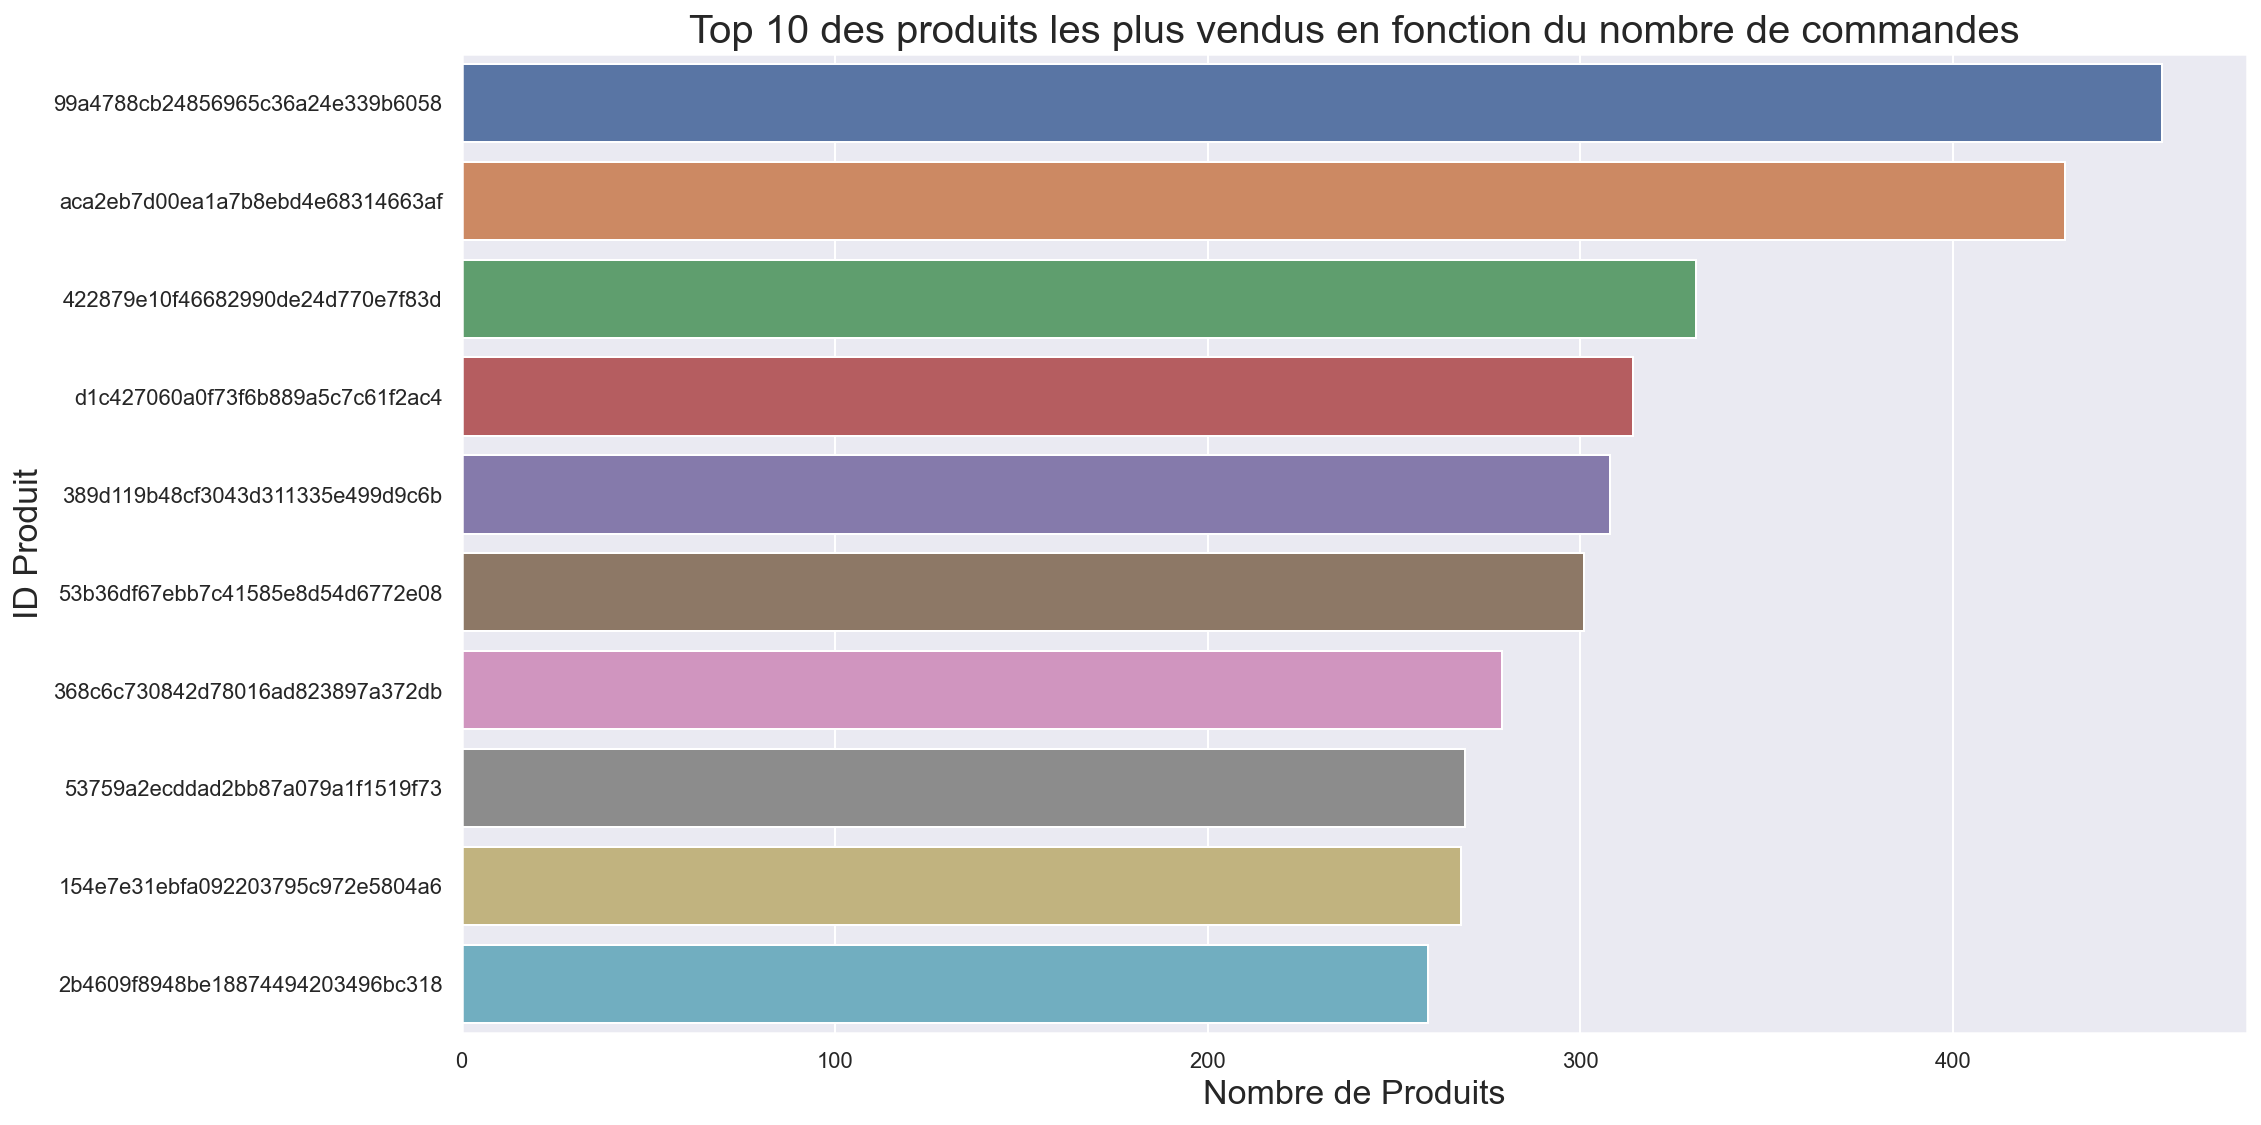

In [17]:
# Affichage des 10 produits les plus vendus
top_10_selling_products = olist['order_id'].groupby(
    olist['product_id']).count().sort_values(ascending=False)[:10]
fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_selling_products.index, x=top_10_selling_products.values)
plt.title('Top 10 des produits les plus vendus en fonction du nombre de commandes', fontsize=20)
plt.xlabel('Nombre de Produits', fontsize=17)
plt.ylabel('ID Produit', fontsize=17)

Le graphique représentant le nombre de produits vendus en fonction d'ID montre qu'il y a certains articles sont plus sollicités que d'autres d'où la représentation du graphe suivant.  
Les articles de première nécessité tels que "bed-bath-table" et "health-beauty" viennent en premier rang puis suivent ceux relatifs aux sports et divertissement ainsi que les ordinateurs et accessoires informatiques.  
En revanche, les autos et les jouets arrivent à la fin du classement.

Text(0, 0.5, 'Categorie du produit')

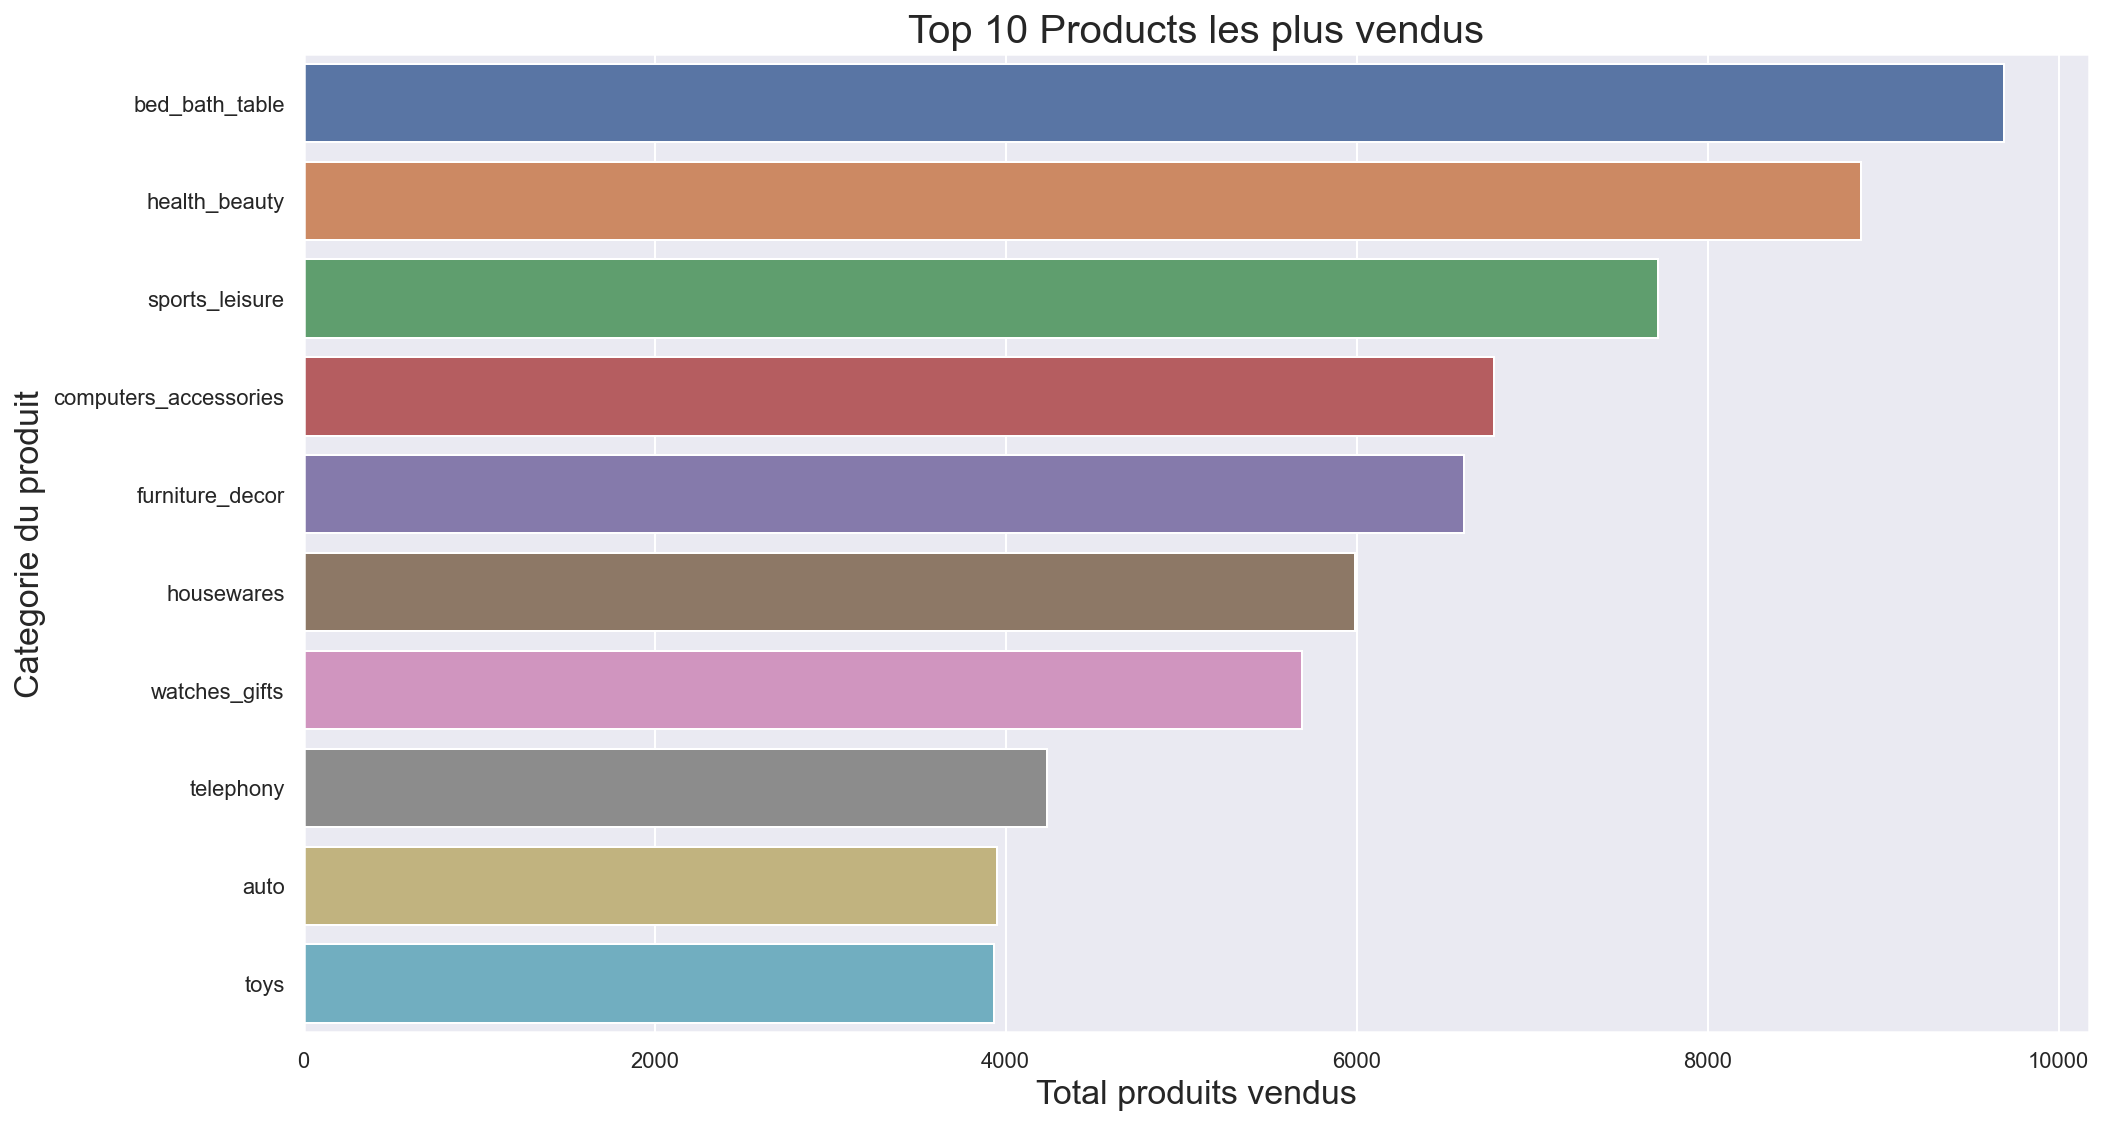

In [18]:
top_10_best_seller_products = olist['order_item_id'].groupby(
    olist['product_category_name_english']).sum().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_best_seller_products.index,
            x=top_10_best_seller_products.values)
plt.title('Top 10 Products les plus vendus', fontsize=20)
plt.xlabel('Total produits vendus', fontsize=17)
plt.ylabel('Categorie du produit', fontsize=17)

Text(0, 0.5, 'ID Consommateur')

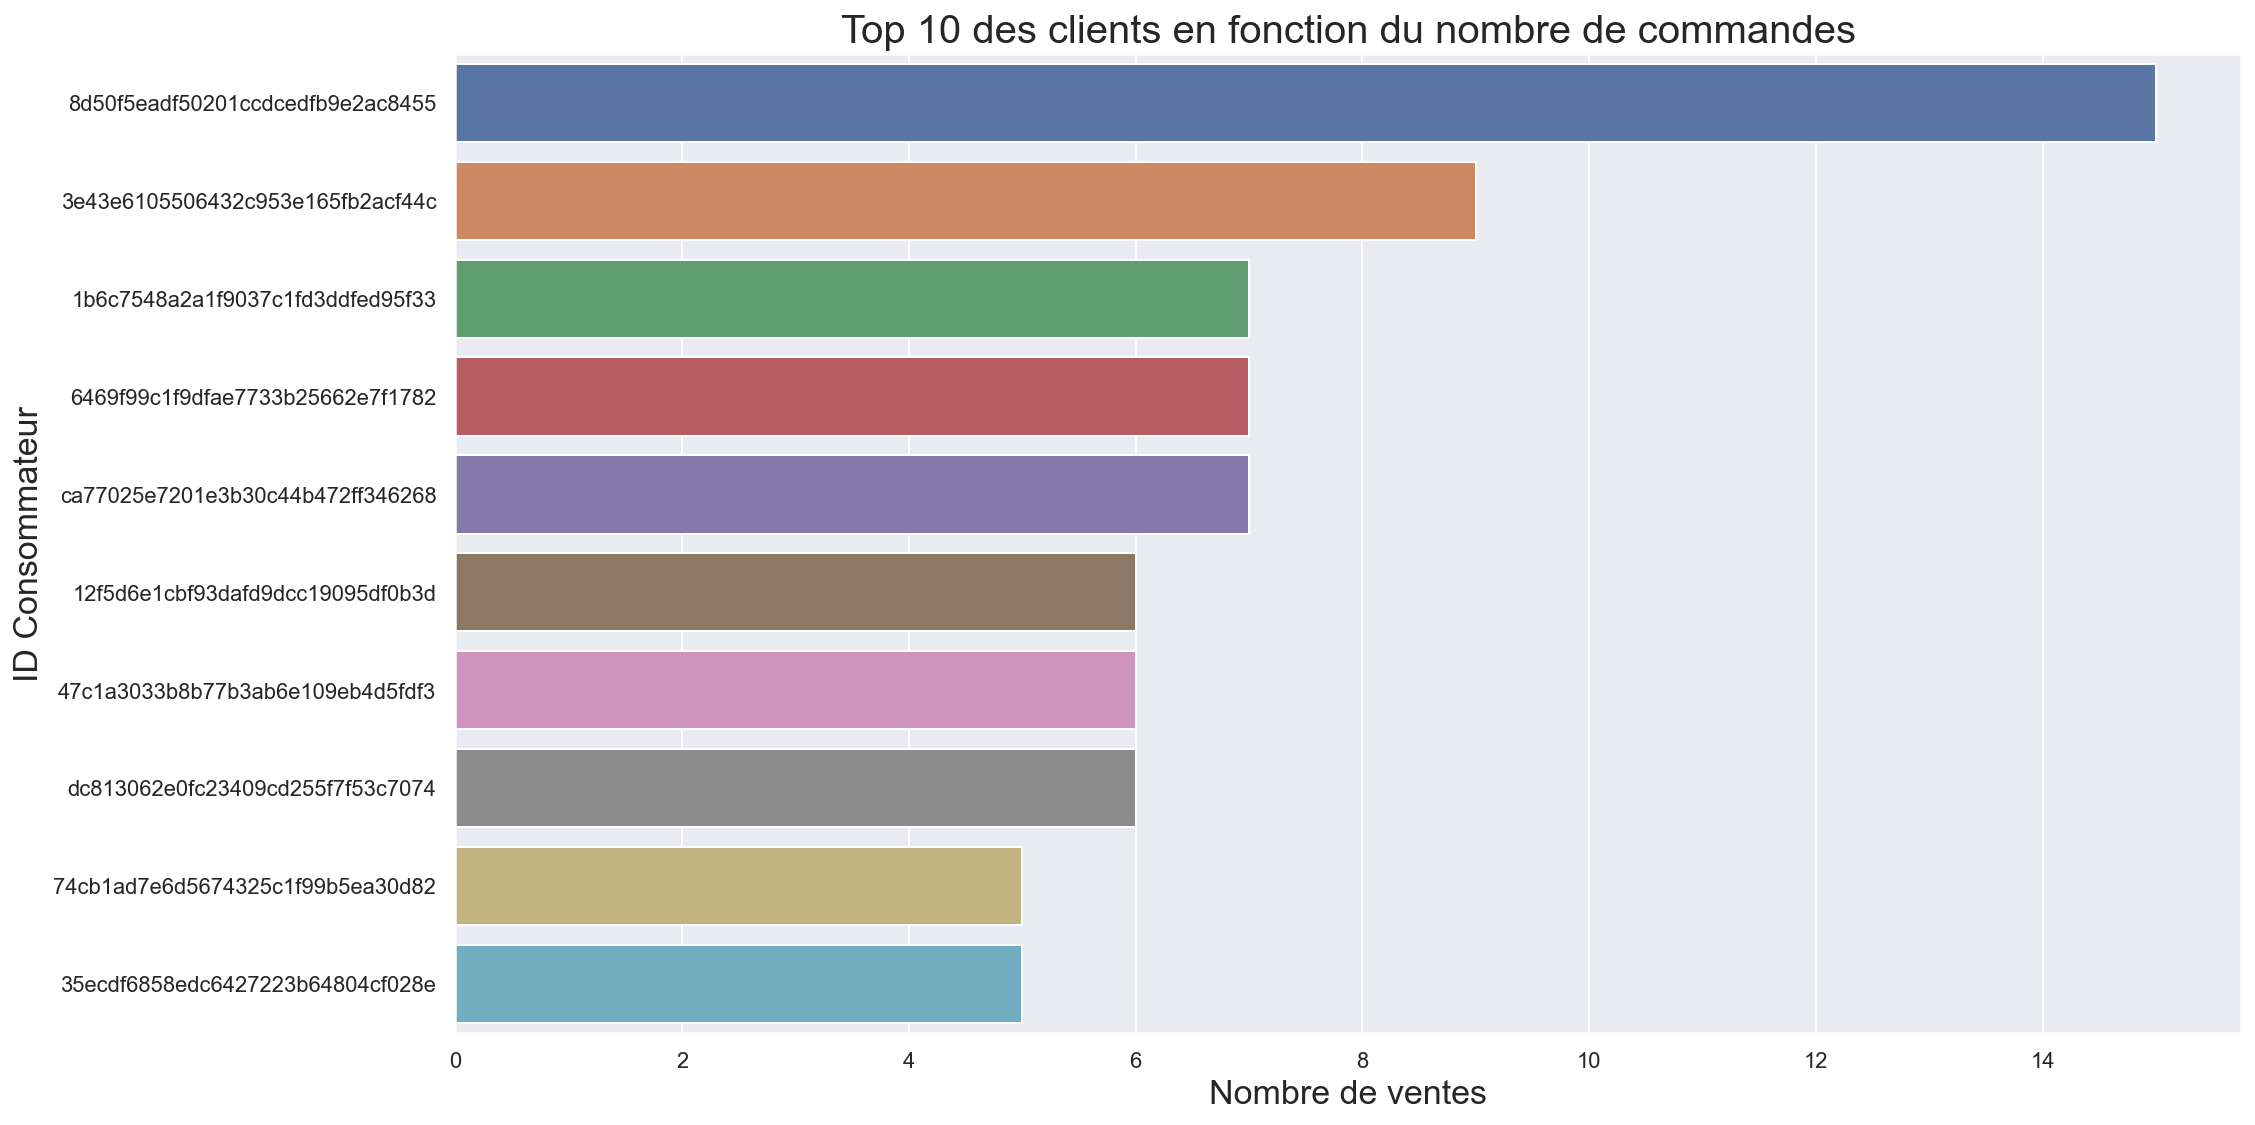

In [19]:
top_10_customer_shopping = olist['order_id'].groupby(
    olist['customer_unique_id']).count().sort_values(ascending=False)[:10]
fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_customer_shopping.index,
            x=top_10_customer_shopping.values)
plt.title('Top 10 des clients en fonction du nombre de commandes', fontsize=20)
plt.xlabel('Nombre de ventes', fontsize=17)
plt.ylabel('ID Consommateur', fontsize=17)

Les graphiques "Top 10 des clients en fonction du nombre de commandes" et "Top 10 des clients en fonction du montant des dépenses" montrent qu'il y a certains client qui achètent et dépensent le double des autres clients ce qui nous amène à vérifier les villes et états qui détiennent le plus grand nombre d'acheteurs via la plateforme olist.

Text(0, 0.5, 'ID Consommateur')

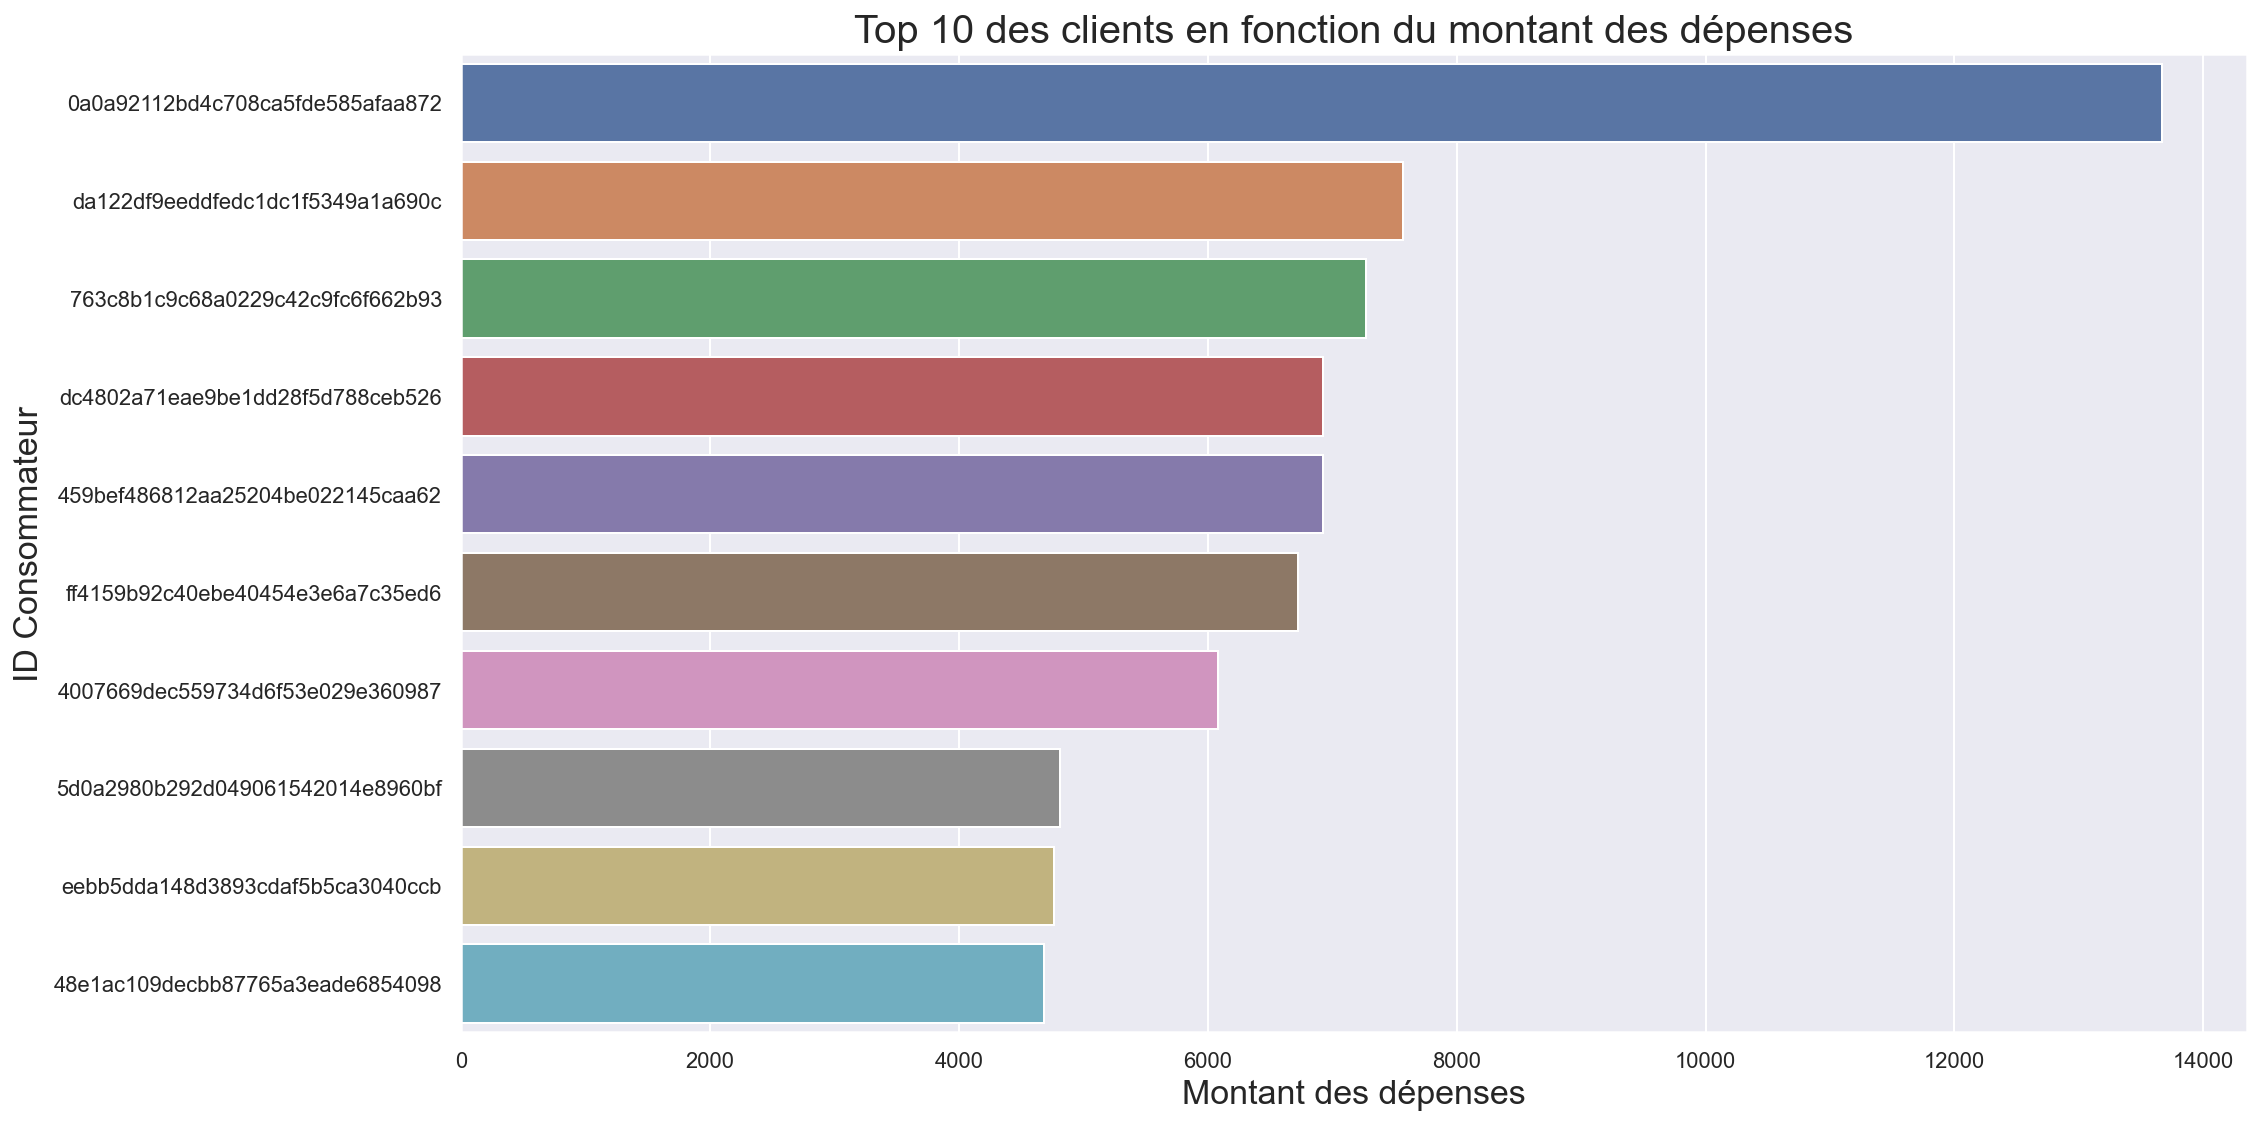

In [20]:
top_10_consumer_spendings = olist['payment_value'].groupby(
    olist['customer_unique_id']).sum().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_consumer_spendings.index,
            x=top_10_consumer_spendings.values)
plt.title('Top 10 des clients en fonction du montant des dépenses', fontsize=20)
plt.xlabel('Montant des dépenses', fontsize=17)
plt.ylabel('ID Consommateur', fontsize=17)

Les deux graphes "Top 10 des états des clients en fonction du nombre de commandes" et "Top 10 des villes en fonction du nombre de commandes" confirment qu'il y a certains  états et villes dont les résidents possèdent un plus grand pouvoir d'achat. On retrouve à la tête Sao Paulo et Rio de Janeiro.

Text(0, 0.5, 'Etat du Consommateur')

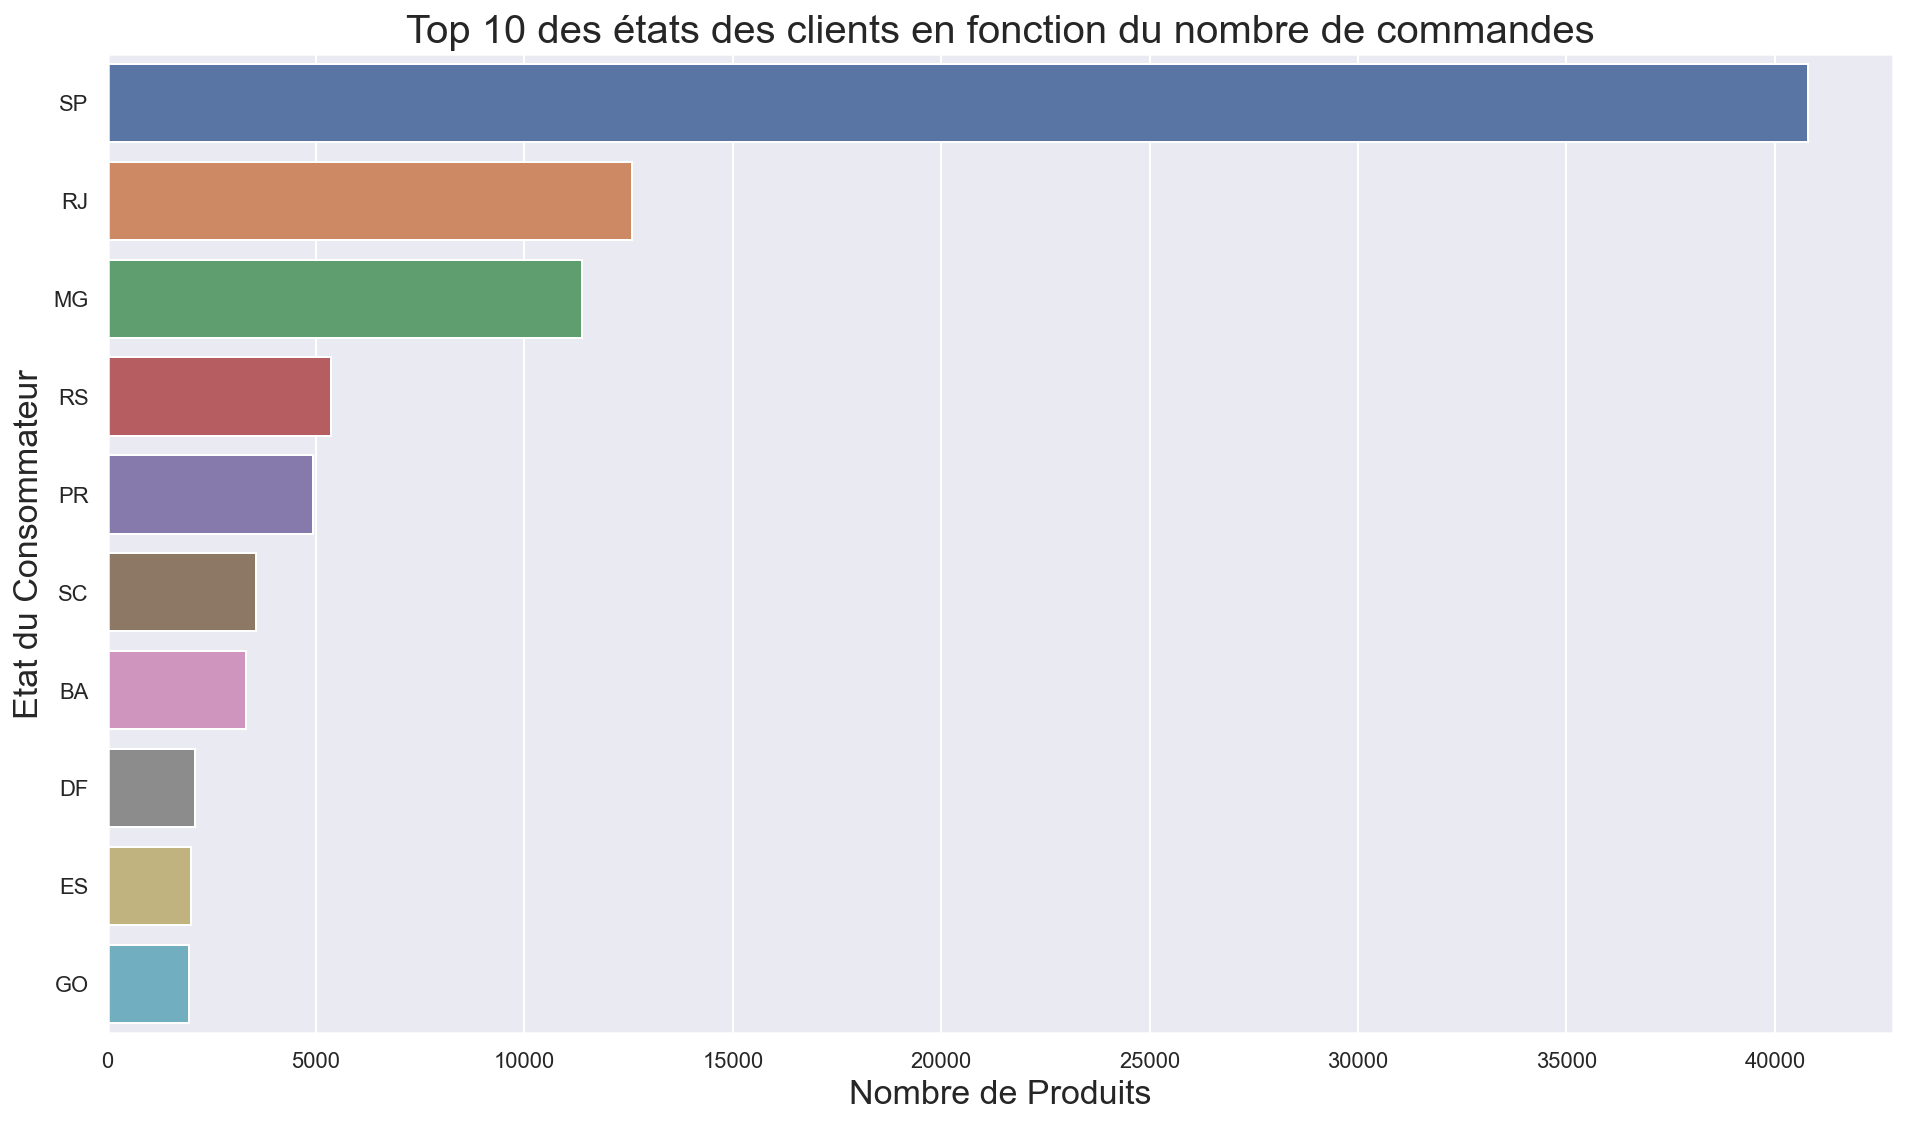

In [21]:
top_10_customer_state = olist['order_item_id'].groupby(
    olist['customer_state']).count().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_customer_state.index, x=top_10_customer_state.values)
plt.title(
    'Top 10 des états des clients en fonction du nombre de commandes', fontsize=20)
plt.xlabel('Nombre de Produits', fontsize=17)
plt.ylabel('Etat du Consommateur', fontsize=17)

Text(0, 0.5, 'Ville')

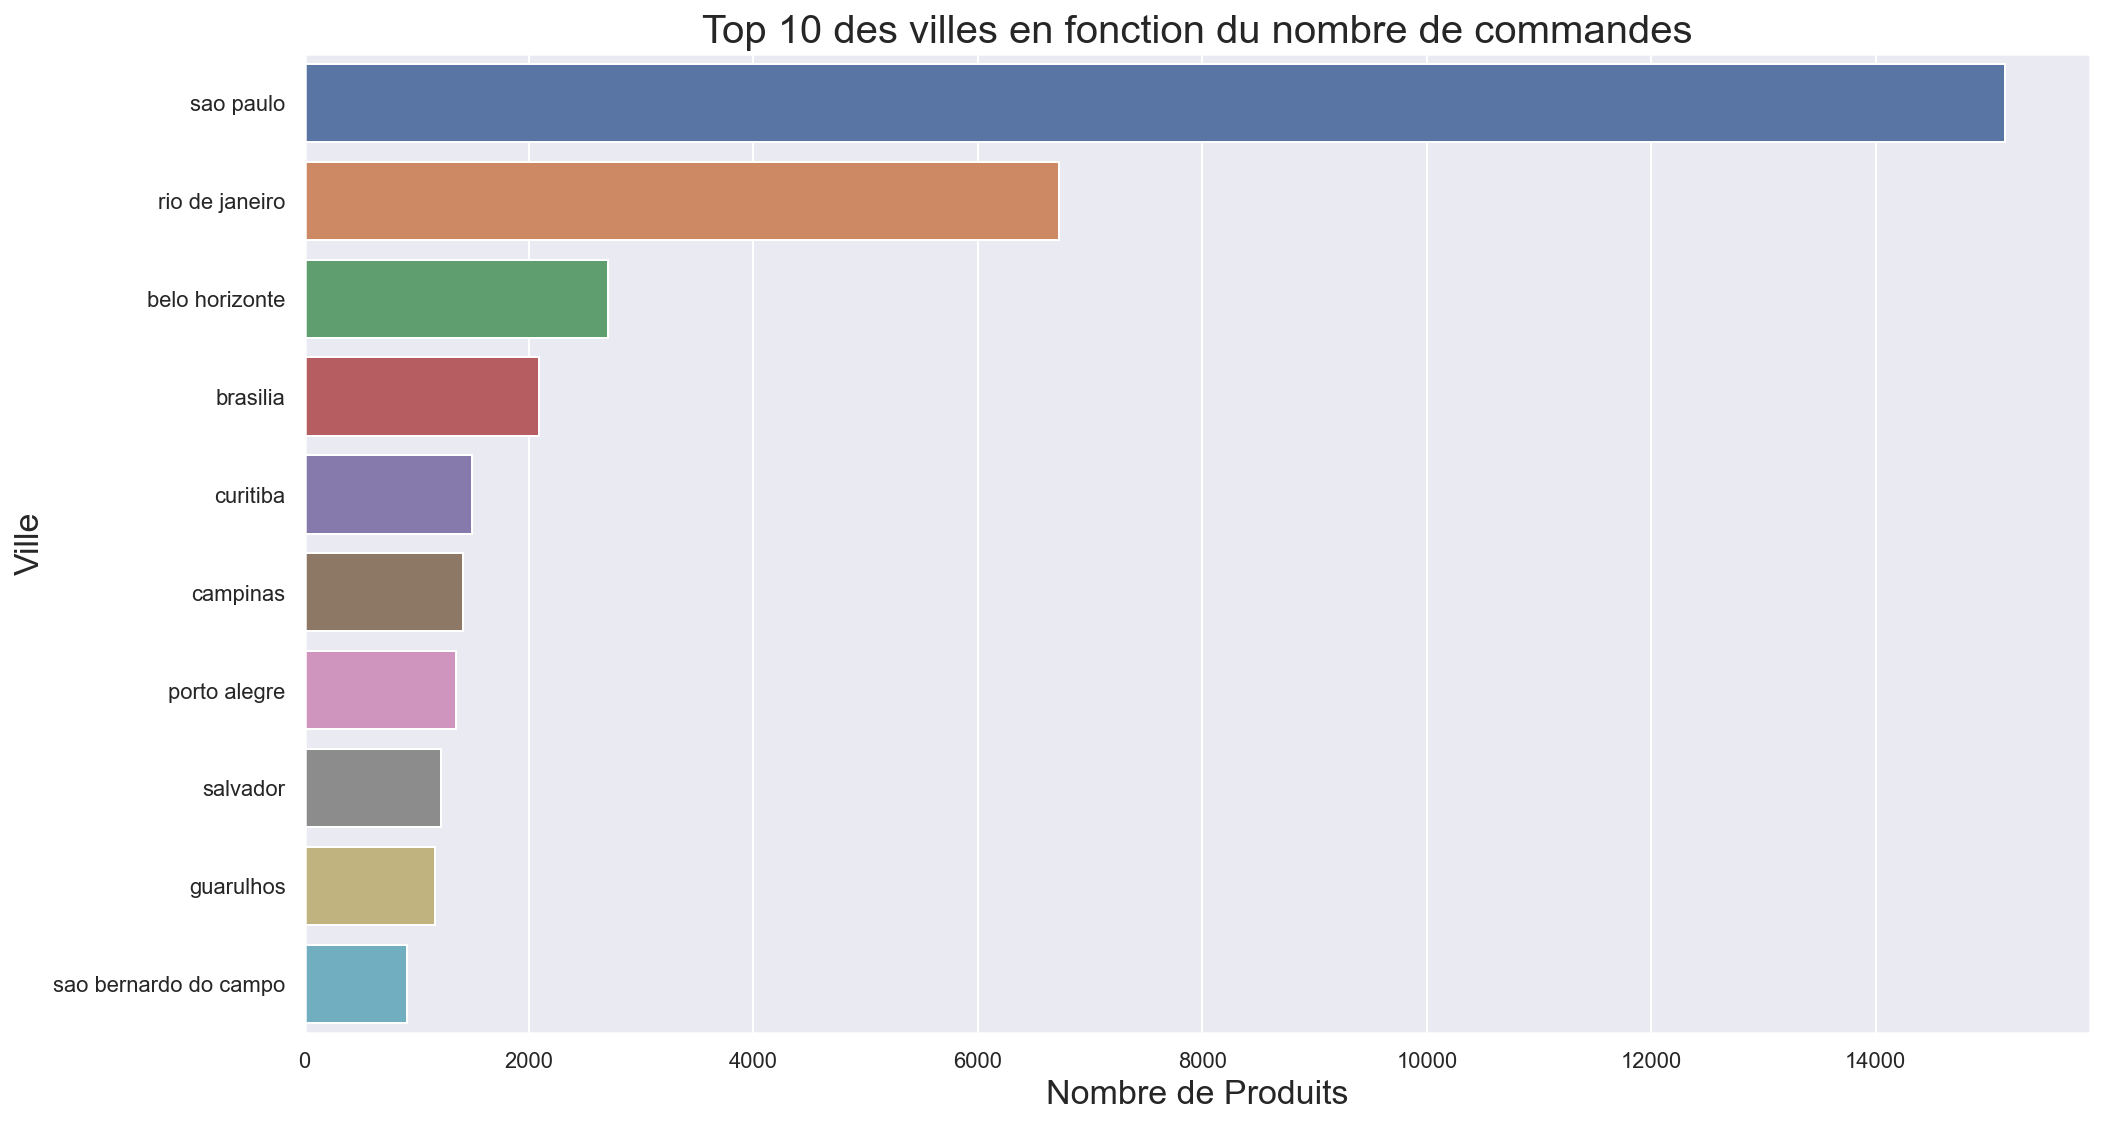

In [22]:
top_10_city = olist['order_id'].groupby(
    olist['customer_city']).count().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(16, 9))
sns.barplot(y=top_10_city.index, x=top_10_city.values)
plt.title('Top 10 des villes en fonction du nombre de commandes', fontsize=20)
plt.xlabel('Nombre de Produits', fontsize=17)
plt.ylabel('Ville', fontsize=17)

Il est intéressant par la suite de déterminer quel moyent de payement est le plus utilisé parmi les utilisateurs de la plateforme et le graphe suivant nommé "Type de Payement vs Montant Total" montre que quasi la totalité des achats se sont effectués à travers les cartes de crédits puis les billets "boleto".

Text(0.5, 1.0, 'Type de Payement vs Montant Total')

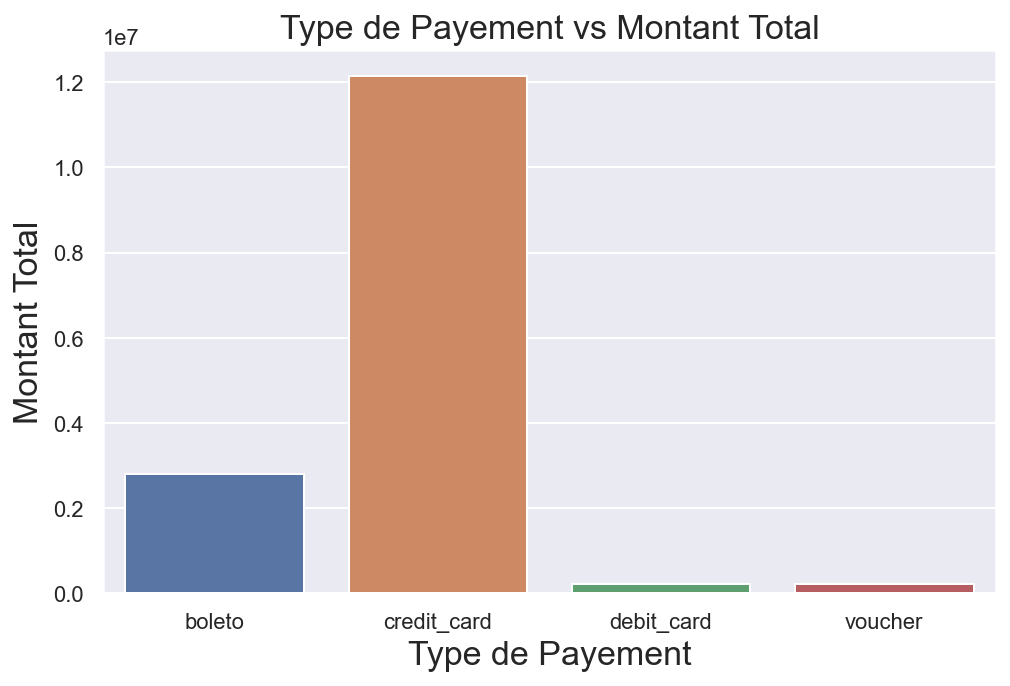

In [23]:
sum1 = []
group = []

for groups, frame in olist.groupby('payment_type'):
    sum1.append(sum(frame['payment_value']))
    group.append(groups)
    
plt.figure()
sns.barplot(x=group, y=sum1)
plt.xlabel('Type de Payement', fontsize=17)
plt.ylabel('Montant Total', fontsize=17)
plt.title('Type de Payement vs Montant Total', fontsize=17)